# COMPUTER VISION PROJECT

## Smoke Detection via YOLOv3 


The group elaborates on learning how to adopt a model via Transfer Learning approach by using open source weights trained on different dataset for the task interested. Right after **YOLO_TRAIN** is run, this one uses the model (weights) trained in the previous notebook to detect smoke in images.

**Mounting Files from Drive**

This step is required so that necessary files `weights`, `configuration`, `test images` are retrieved in a facilitated way.

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


To run the notebook smoothly, path may be needed to revise accordingly.

In [ ]:
cd Notebooks/...

0
[[0]]


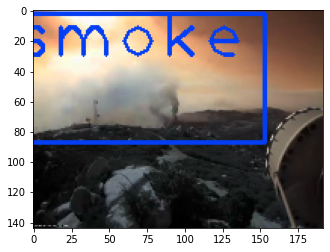

0
[[0]]


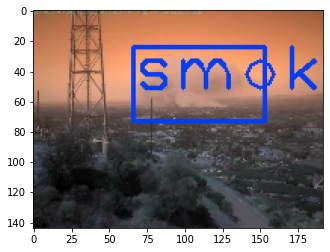

()


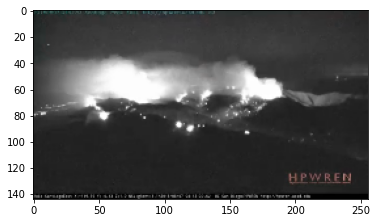

0
[[0]]


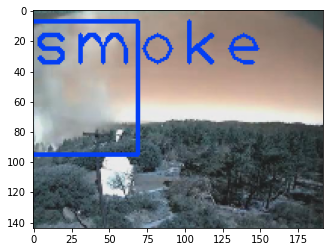

0
[[0]]


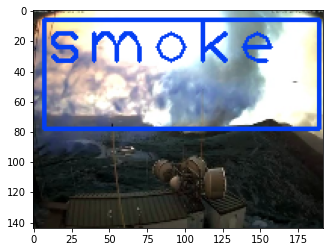

0
[[0]]


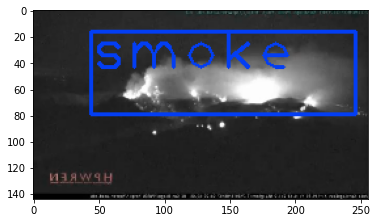

0
[[0]]


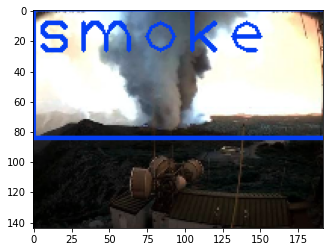

0
[[0]]


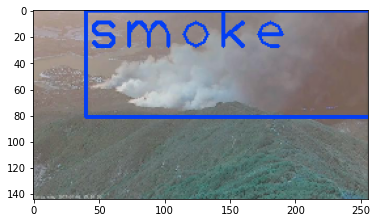

0
[[0]]


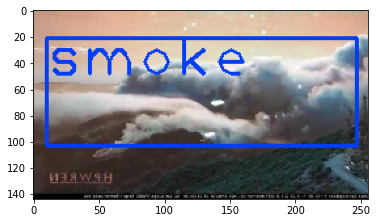

0
[[0]]


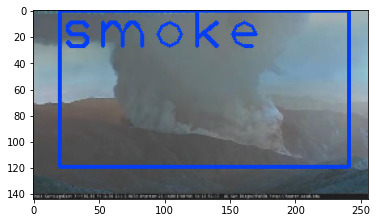

0
[[0]]


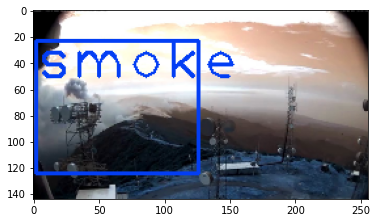

()


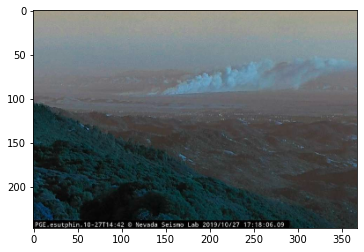

0
()


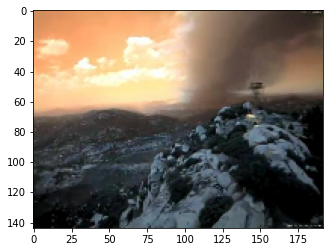

In [15]:
#import the necessary packages
from matplotlib import pyplot as plt
import cv2
import numpy as np
import glob
import random

# Load YOLO weights and model configuration
net = cv2.dnn.readNet("yolov3_training_last.weights", "yolov3_testing.cfg")

# Creating class for object to be detected
classes = ["smoke"]

# Path for test images
images_path = glob.glob(r"test_images/*.jpg")

# determine only the *output* layer names that we need from YOLO
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Parth for images
random.shuffle(images_path)

# Loop through all the images

for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Displaying information on images
    class_ids = []
    confidences = []
    boxes = []

    # loop over the results
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
              
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    
    # output frame and show the detected label
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    print(indexes)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            cv2.putText(img, label, (x, y + 30), font, 3, color, 2)

    #Displaying image
    plt.imshow(img)
    plt.show()
    key = cv2.waitKey(5)

cv2.destroyAllWindows()